In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)
(256, 256)


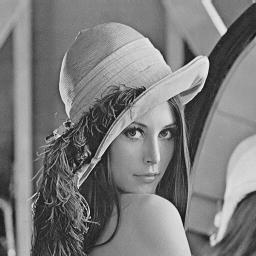

In [2]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gImg1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
cv2_imshow(gImg1)

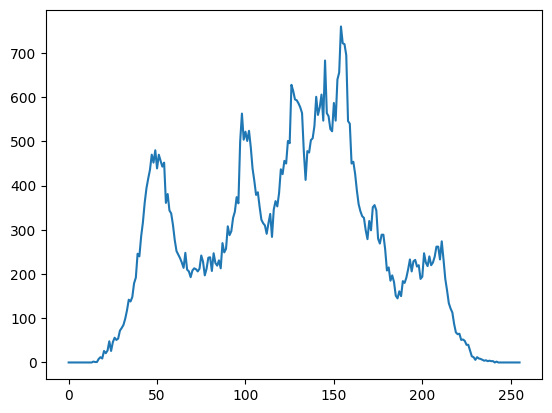

In [3]:
hist = cv2.calcHist([gImg1],[0],None,[256],[0,255])
plt.plot(hist)

(256, 256, 3)
(256, 256)


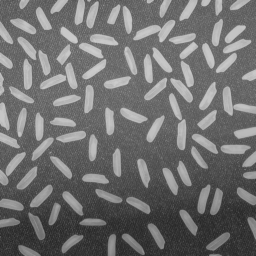

In [4]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
print(img.shape)
gImg2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gImg2.shape)
cv2_imshow(gImg2)

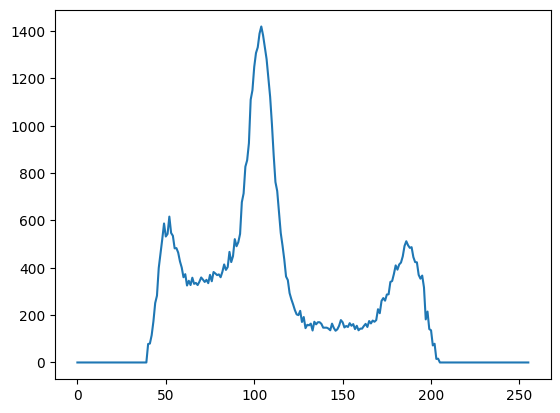

In [5]:
hist = cv2.calcHist([gImg2],[0],None,[256],[0,255])
plt.plot(hist)

(360, 360, 3)
(360, 360)


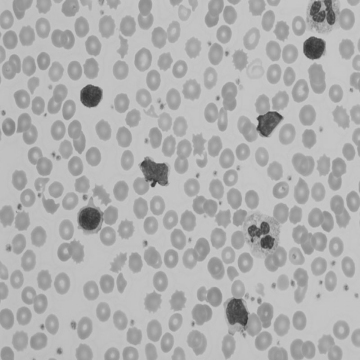

In [6]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell.bmp')
print(img.shape)
gImg3=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gImg3.shape)
cv2_imshow(gImg3)

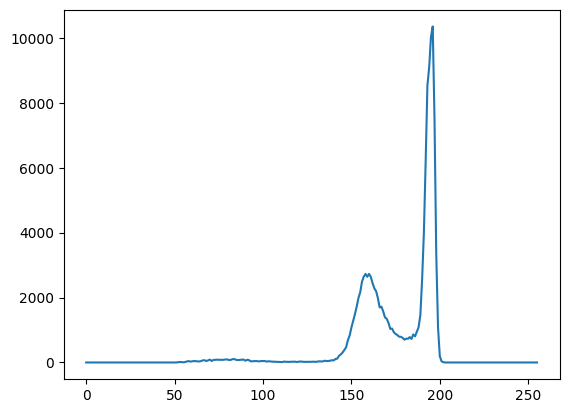

In [7]:
hist = cv2.calcHist([gImg3],[0],None,[256],[0,255])
plt.plot(hist)

(256, 256, 3)
(256, 256)


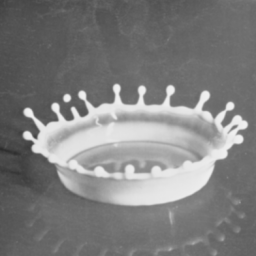

In [8]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/milkdrop.bmp')
print(img.shape)
gImg4=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gImg4.shape)
cv2_imshow(gImg4)

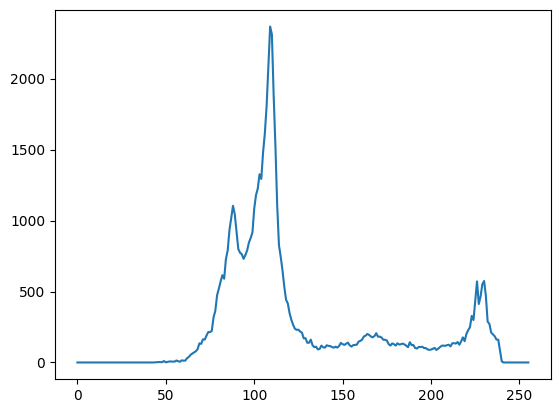

In [9]:
hist = cv2.calcHist([gImg4],[0],None,[256],[0,255])
plt.plot(hist)

In [10]:
gBin = np.zeros((gImg3.shape[0],gImg3.shape[1]), dtype=np.ubyte)

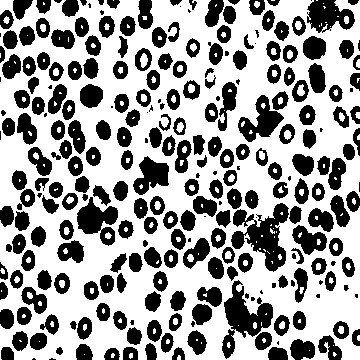

In [11]:
Threshold = 170;
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h,w] > Threshold:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0
cv2_imshow(gBin)

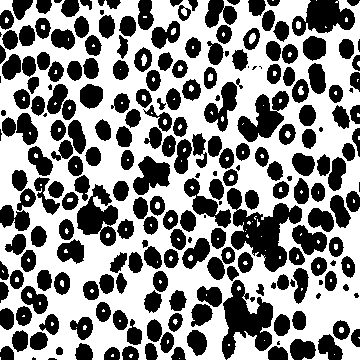

In [12]:
Threshold = 180;
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h,w] > Threshold:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0
cv2_imshow(gBin)

(360, 360, 3)
(360, 360)


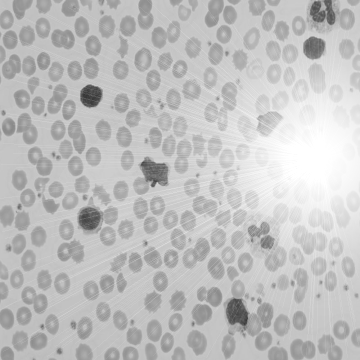

In [13]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/cell-bright.bmp')
print(img.shape)
gImg5=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gImg5.shape)
cv2_imshow(gImg5)

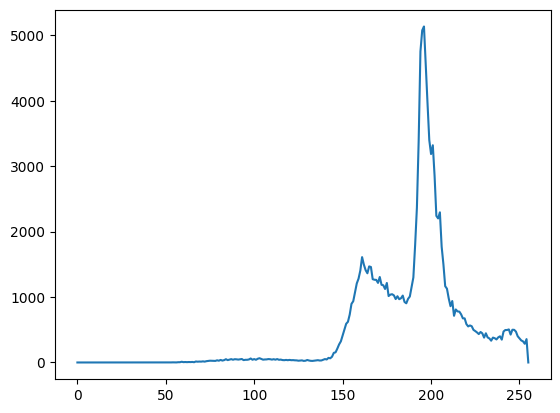

In [14]:
hist = cv2.calcHist([gImg5],[0],None,[256],[0,255])
plt.plot(hist)

In [15]:
gBin = np.zeros((gImg5.shape[0],gImg5.shape[1]), dtype=np.ubyte)

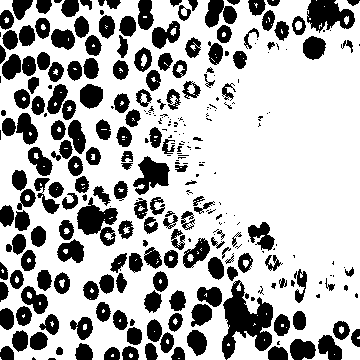

In [16]:
Threshold = 180;
for h in range(gImg5.shape[0]):
  for w in range(gImg5.shape[1]):
    if gImg5[h,w] > Threshold:
      gBin[h,w] = 255
    else:
      gBin[h,w] = 0
cv2_imshow(gBin)

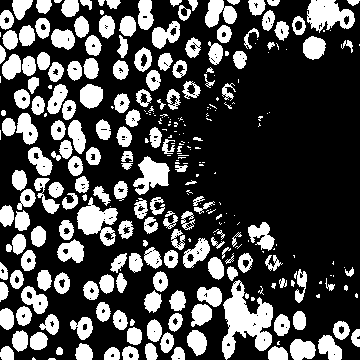

In [17]:
Threshold = 180;
for h in range(gImg5.shape[0]):
  for w in range(gImg5.shape[1]):
    if gImg5[h,w] > Threshold:
      gBin[h,w] = 0
    else:
      gBin[h,w] = 255
cv2_imshow(gBin)

In [18]:
t1 = 128
T2 = 0
t0 = 1


In [19]:
def threshold_update(img, bImg):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if bImg[h,w] == 0:
        sum1 = np.int32(sum1 + img[h,w])
        count1 = count1 + 1
      else:
        sum2 = np.int32(sum2 + img[h,w])
        count2 = count2 + 1
  avg1 = sum1/count1
  avg2 = sum2/count2
  T = (avg1 + avg2)/2
  return T

In [20]:
gBin = np.zeros((gImg3.shape[0],gImg3.shape[1]), dtype=np.ubyte)

In [21]:
for h in range(gImg3.shape[0]):
  for w in range(gImg3.shape[1]):
    if gImg3[h,w] > T1:
      gBin[h,w] = 0
    else:
      gBin[h,w] = 255
cv2_imshow(gBin)

NameError: name 'T1' is not defined

In [22]:
while True:
  T2 = threshold_update(gImg3, gBin)

  if(np.abs(T1-T2) < T0):
    break
  else:
    T1=T2
    for h in range(gImg3.shape[0]):
      for w in range(gImg3.shape[1]):
        if gImg3[h,w] > T1:
          gBin[h,w] = 0
        else:
          gBin[h,w] = 255
print(T2)
cv2_imshow(gBin)

NameError: name 'T1' is not defined